In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [37]:

tf.keras.mixed_precision.set_global_policy('mixed_float16')


tf.config.optimizer.set_jit(True)

In [3]:
(train_imgs,train_labels),(test_imgs,test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

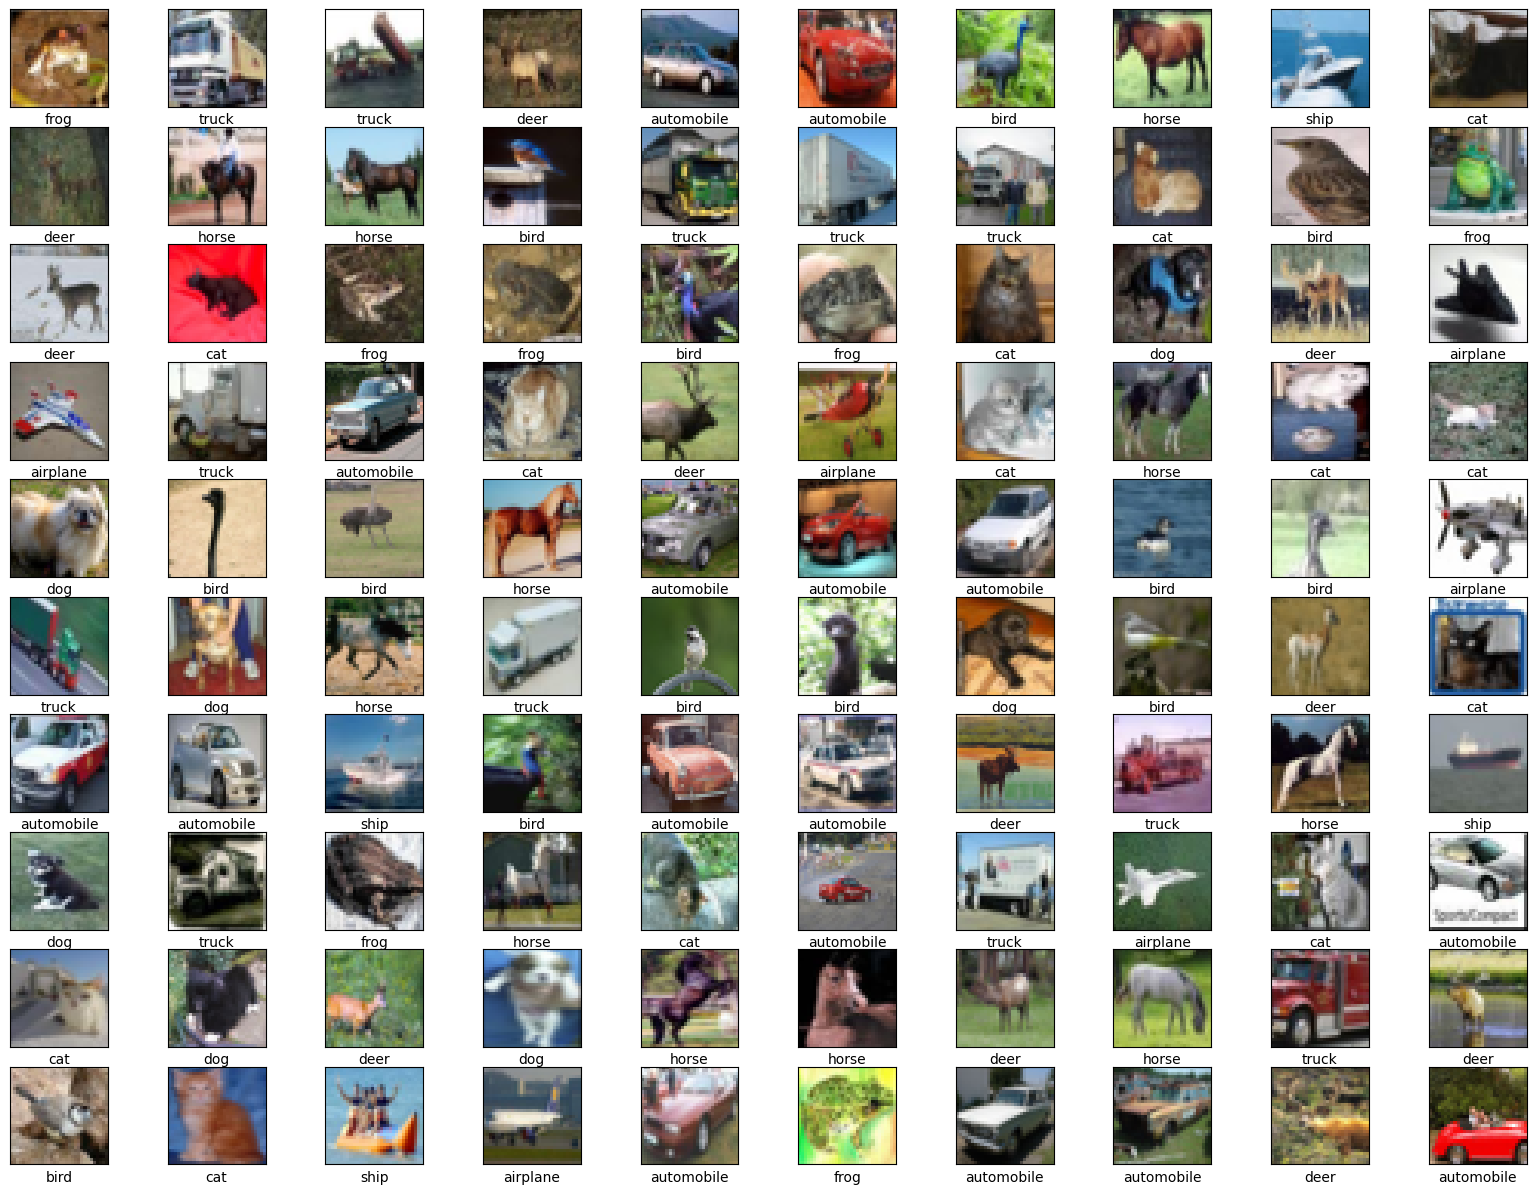

In [6]:
plt.figure(figsize=(20,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_imgs[i])
    plt.xlabel(classes[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
def create_model(optimizer, loss_function):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer and loss function
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    return model

In [8]:
optimizers = ['adam', 'rmsprop', 'sgd']
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy']

In [9]:
results = {}

In [11]:
for optimizer in optimizers:
    for loss_function in loss_functions:
        # Create the model
        model = create_model(optimizer, loss_function)

        # Train the model
        history = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels), verbose=1)

        # Evaluate the model on the test set
        loss, accuracy = model.evaluate(test_imgs, test_labels, verbose=0)

        # Store the results
        results[(optimizer, loss_function)] = {'accuracy': accuracy, 'loss': loss}

Epoch 1/10
1563/1563 [==============================] - 15s 7ms/step - loss: 1.4323 - accuracy: 0.4828 - val_loss: 1.2096 - val_accuracy: 0.5730
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0162 - accuracy: 0.6436 - val_loss: 0.9746 - val_accuracy: 0.6585
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8478 - accuracy: 0.7019 - val_loss: 0.8895 - val_accuracy: 0.6945
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7468 - accuracy: 0.7385 - val_loss: 0.8339 - val_accuracy: 0.7117
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6635 - accuracy: 0.7671 - val_loss: 0.8472 - val_accuracy: 0.7075
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5928 - accuracy: 0.7901 - val_loss: 0.8317 - val_accuracy: 0.7253
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5224 - accuracy: 0.8170 - val_loss: 0.8948 - val_accurac

ValueError: ignored

In [12]:
for key, value in results.items():
    print(f"Optimizer: {key[0]}, Loss Function: {key[1]}, Accuracy: {value['accuracy']:.4f}, Loss: {value['loss']:.4f}")

Optimizer: adam, Loss Function: sparse_categorical_crossentropy, Accuracy: 0.7088, Loss: 1.0204


In [13]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
h = model.fit(x = train_imgs, y= train_labels, epochs=25, validation_split = 0.5, batch_size=200)

Epoch 1/25
125/125 [==============================] - 29s 230ms/step - loss: 6.1938e-05 - accuracy: 1.0000 - val_loss: 4.0979 - val_accuracy: 0.6692
Epoch 2/25
125/125 [==============================] - 2s 12ms/step - loss: 5.8988e-05 - accuracy: 1.0000 - val_loss: 4.1137 - val_accuracy: 0.6695
Epoch 3/25
125/125 [==============================] - 1s 10ms/step - loss: 5.5550e-05 - accuracy: 1.0000 - val_loss: 4.1251 - val_accuracy: 0.6692
Epoch 4/25
125/125 [==============================] - 1s 12ms/step - loss: 5.3283e-05 - accuracy: 1.0000 - val_loss: 4.1427 - val_accuracy: 0.6696
Epoch 5/25
125/125 [==============================] - 1s 12ms/step - loss: 4.9955e-05 - accuracy: 1.0000 - val_loss: 4.1553 - val_accuracy: 0.6692
Epoch 6/25
125/125 [==============================] - 1s 9ms/step - loss: 4.7106e-05 - accuracy: 1.0000 - val_loss: 4.1666 - val_accuracy: 0.6694
Epoch 7/25
125/125 [==============================] - 1s 9ms/step - loss: 4.4507e-05 - accuracy: 1.0000 - val_loss: 4

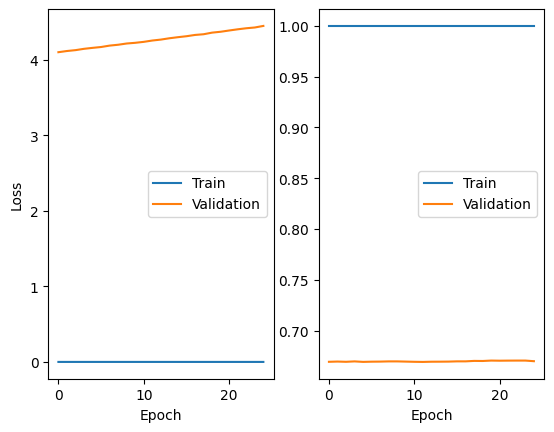

In [41]:
plt.figure()

plt.subplot(1,2,2)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
#plt.axis([0,10,0,1])

plt.subplot(1,2,1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
#plt.axis([0,10,0,1])

plt.show()